In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Charger les données
links_df = pd.read_csv('/Film_recom/links.csv')

# Afficher les premières lignes du DataFrame
print(links_df.head())

# Afficher les informations sur le DataFrame
print(links_df.info())

# 1. Vérifier les valeurs manquantes
print(links_df.isnull().sum())

# 2. Statistiques descriptives des colonnes numériques (si présentes)
numeric_columns = links_df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    print(f"\nStatistiques descriptives pour {col}:")
    print(links_df[col].describe())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB
None
movieId      0
imdbId       0
tmdbId     252
dtype: int64

Statistiques descriptives pour movieId:
count     27278.000000
mean      59855.480570
std       44429.314697
min           1.000000
25%        6931.250000
50%       68068.000000
75%      100293.250000
max      131262.000000
Name: movieId, dtype: float64

Statistiques descriptives pour imdbId:
count    2.727800e+04
mean     5.781860e+05
std      7.804707e+05
min      5.000000e+00
25%      7.741725e+04
50%      1.524

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Charger les données
links_df = pd.read_csv('/Film_recom/links.csv')


# 1. Vérifier les valeurs manquantes
print("\nValeurs manquantes dans le DataFrame original:")
print(links_df.isnull().sum())

# 2. Vérifier les doublons
duplicates_count = links_df.duplicated().sum()
print(f"\nNombre de doublons dans le DataFrame original: {duplicates_count}")

# 3. Nettoyage des données

# Supprimer les doublons
links_df.drop_duplicates(inplace=True)

# Gérer les valeurs manquantes
links_df.dropna(inplace=True)

print("\nAprès nettoyage:")
print(links_df.info())

print("\nValeurs manquantes après nettoyage:")
print(links_df.isnull().sum())

# 4. Statistiques descriptives des colonnes numériques
print("\nStatistiques descriptives après nettoyage:")
print(links_df.describe())

# Maintenant, nous pouvons procéder aux visualisations avec les données nettoyées

Premières lignes du DataFrame original:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

Informations sur le DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB
None

Valeurs manquantes dans le DataFrame original:
movieId      0
imdbId       0
tmdbId     252
dtype: int64

Nombre de doublons dans le DataFrame original: 0

Après nettoyage:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27026 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27026 non-null  int64  


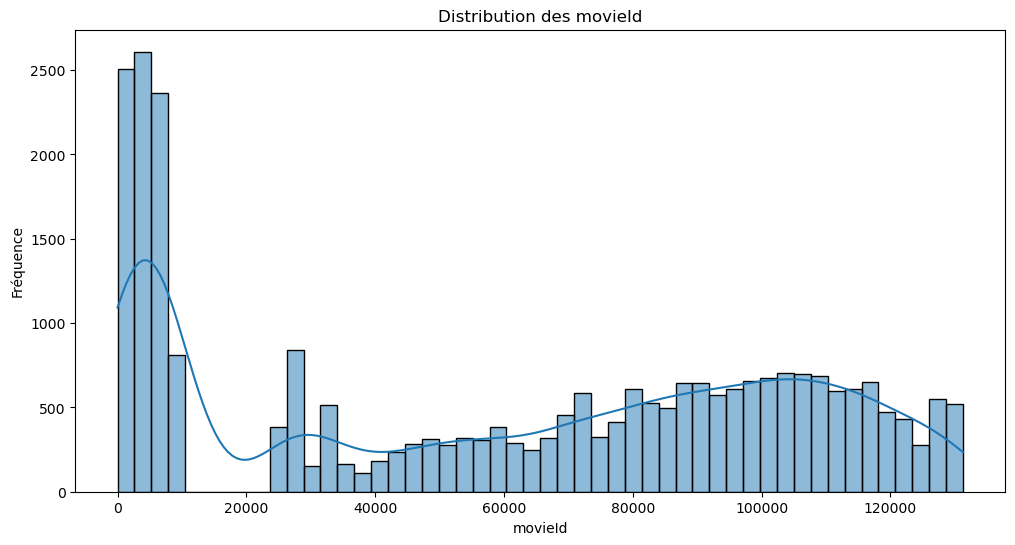

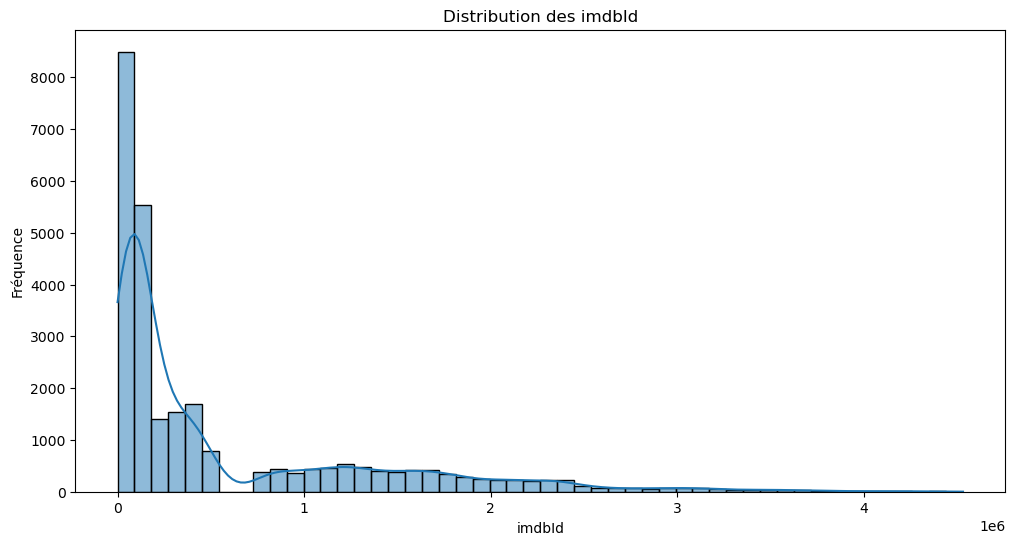

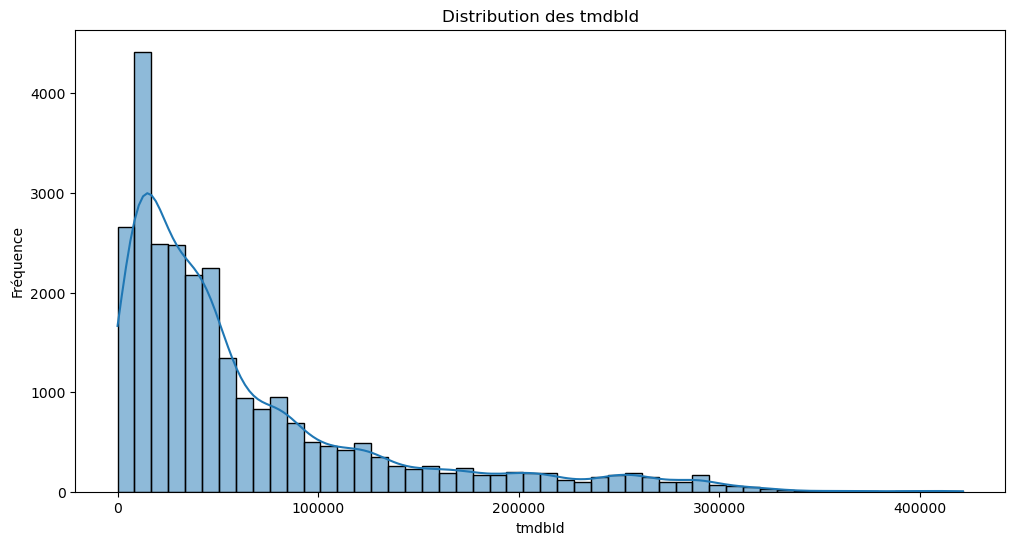

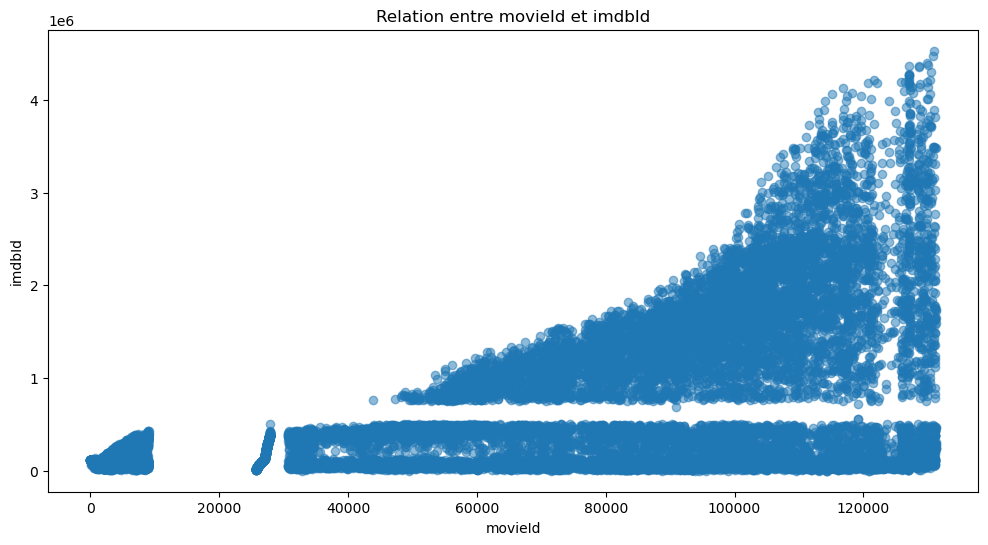

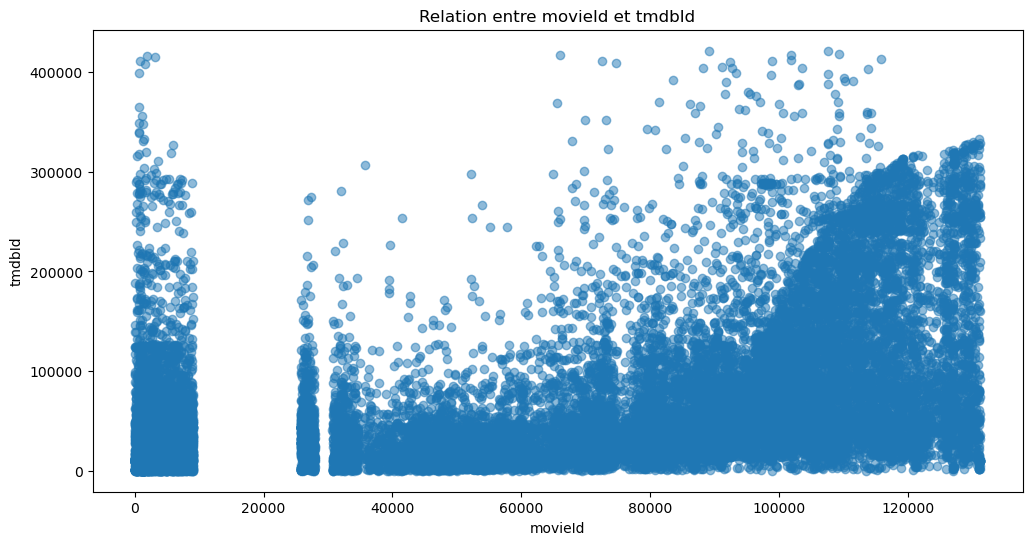

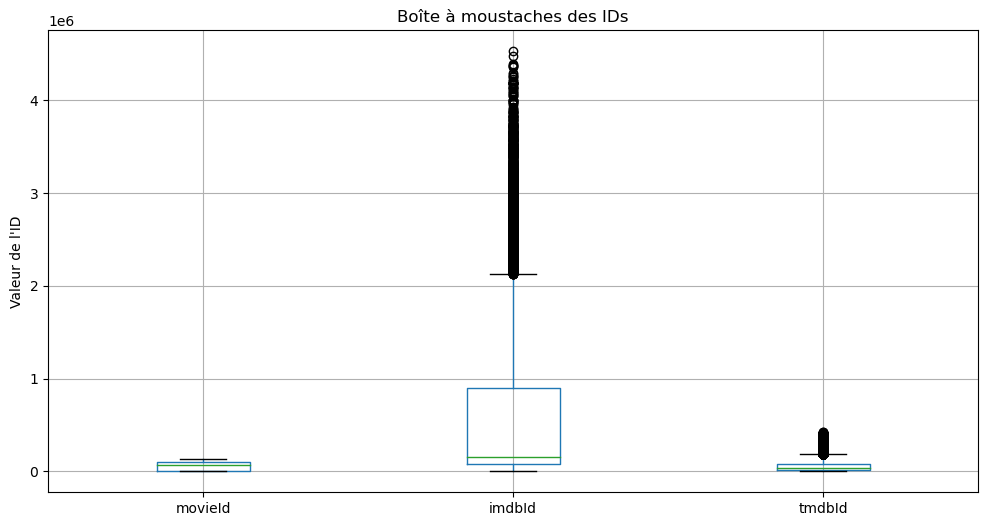

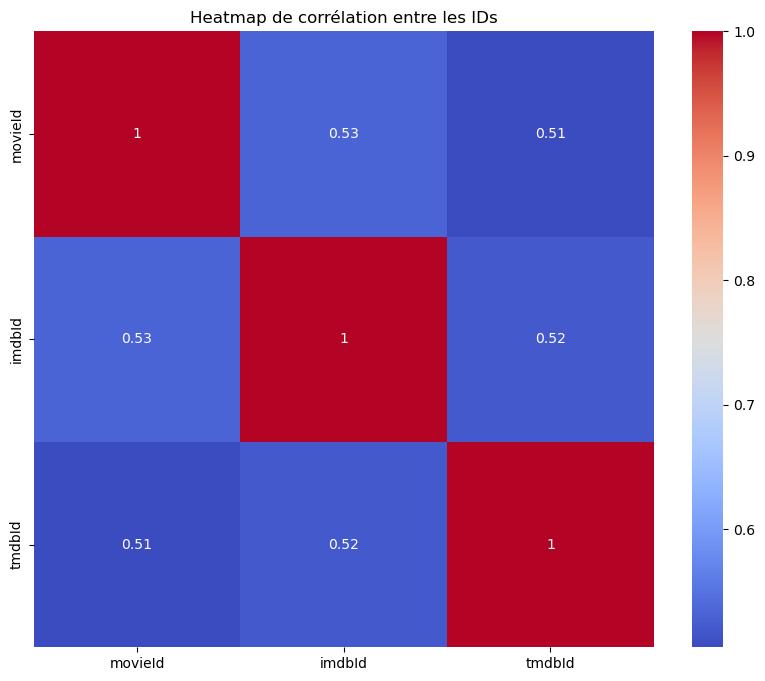

<Figure size 1200x1000 with 0 Axes>

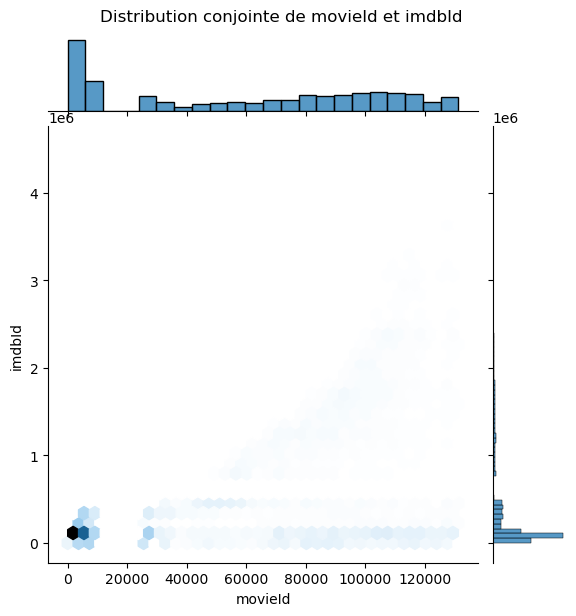

In [6]:
# Visualisations

# 1. Distribution des movieId
plt.figure(figsize=(12, 6))
sns.histplot(links_df['movieId'], bins=50, kde=True)
plt.title('Distribution des movieId')
plt.xlabel('movieId')
plt.ylabel('Fréquence')
plt.show()

# 2. Distribution des imdbId
plt.figure(figsize=(12, 6))
sns.histplot(links_df['imdbId'], bins=50, kde=True)
plt.title('Distribution des imdbId')
plt.xlabel('imdbId')
plt.ylabel('Fréquence')
plt.show()

# 3. Distribution des tmdbId
plt.figure(figsize=(12, 6))
sns.histplot(links_df['tmdbId'], bins=50, kde=True)
plt.title('Distribution des tmdbId')
plt.xlabel('tmdbId')
plt.ylabel('Fréquence')
plt.show()

# 4. Relation entre movieId et imdbId
plt.figure(figsize=(12, 6))
plt.scatter(links_df['movieId'], links_df['imdbId'], alpha=0.5)
plt.title('Relation entre movieId et imdbId')
plt.xlabel('movieId')
plt.ylabel('imdbId')
plt.show()

# 5. Relation entre movieId et tmdbId
plt.figure(figsize=(12, 6))
plt.scatter(links_df['movieId'], links_df['tmdbId'], alpha=0.5)
plt.title('Relation entre movieId et tmdbId')
plt.xlabel('movieId')
plt.ylabel('tmdbId')
plt.show()

# 6. Boîte à moustaches pour chaque type d'ID
plt.figure(figsize=(12, 6))
links_df.boxplot(column=['movieId', 'imdbId', 'tmdbId'])
plt.title('Boîte à moustaches des IDs')
plt.ylabel('Valeur de l\'ID')
plt.show()

# 7. Heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(links_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de corrélation entre les IDs')
plt.show()

# 8. Distribution conjointe de movieId et imdbId
plt.figure(figsize=(12, 10))
sns.jointplot(x='movieId', y='imdbId', data=links_df, kind='hex')
plt.suptitle('Distribution conjointe de movieId et imdbId', y=1.02)
plt.show()

In [ ]:
from links_pipeline import LinkDataPipeline

# Créer une instance du pipeline
pipeline = LinkDataPipeline('/Film_recom/links.csv')

# Exécuter le pipeline
pipeline.run_pipeline()

# Si vous voulez accéder aux données traitées
processed_data = pipeline.get_data()

# Vous pouvez maintenant utiliser processed_data pour d'autres analyses si nécessaire